Epoch 1/30
30/30 [==============================] - 2s 12ms/step - loss: 0.5962 - accuracy: 0.8400 - val_loss: 0.4678 - val_accuracy: 1.0000
Epoch 2/30
30/30 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.9967 - val_loss: 0.2699 - val_accuracy: 1.0000
Epoch 3/30
30/30 [==============================] - 0s 4ms/step - loss: 0.2150 - accuracy: 1.0000 - val_loss: 0.1203 - val_accuracy: 1.0000
Epoch 4/30
30/30 [==============================] - 0s 4ms/step - loss: 0.1104 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 5/30
30/30 [==============================] - 0s 4ms/step - loss: 0.0585 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 6/30
30/30 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/30
30/30 [==============================] - 0s 4ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 8/30
30/30 [=

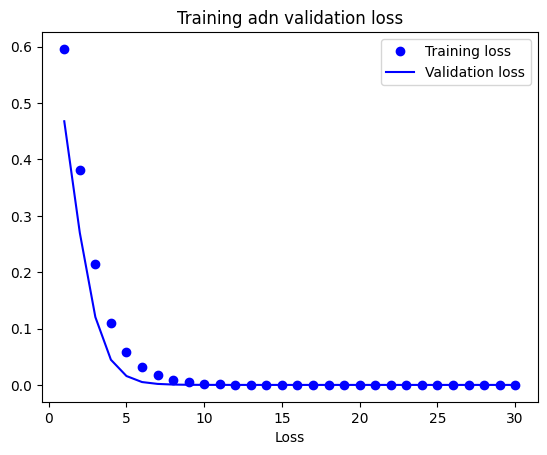

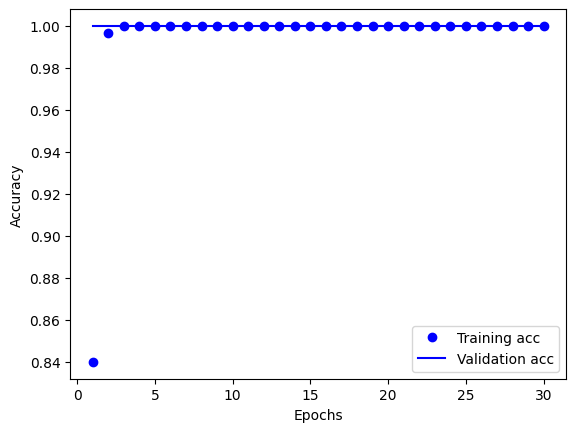

In [2]:
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

def get_ionodata():
    converter={34: (lambda x: 1 if x =='g' else 0)}
    ionodata= np.loadtxt(fname='./ionosphere.data', delimiter=',', converters=converter)

    train, test = ionodata[:300,...],ionodata[300:,...]
    return (train[:,:-1],train[:,-1]), (test[:,:-1], test[:,-1])

(train_data, train_label), (test_data, test_label) = get_ionodata()

model = models.Sequential();
model.add(layers.Dense(16, activation='relu', input_shape=(34,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

train_x_data=train_data[:250,:]
train_y= train_label[:250]

val_x_data=train_data[250:, :]
val_y_data=train_label[250:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_label, batch_size=10, epochs=30, validation_data=(val_x_data, val_y_data))

print('----------------------------------')
result = model.evaluate(test_data, test_label)
print(result)

print('----------------------------------')

history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training adn validation loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history_dict['accuracy']
val_acc=history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
